# Chapter 3: A Tour of Machine Learning Classifiers Using Scikit-learn

**No Free Lunch**

No single classfier works best across all possible scenarios.

## Load data

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [2]:
# from sklearn.cross_validation import train_test_split
# depreciate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, test_size=0.3, random_state=0)

## Data Preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Perceptron

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [5]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" % (y_test != y_pred).sum())

Misclassified samples: 4


In [6]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.91


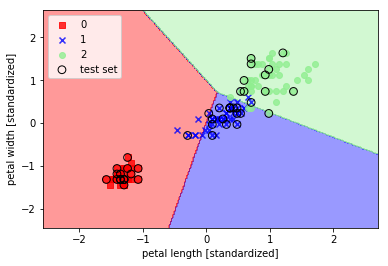

In [23]:
import matplotlib.pyplot as plt
from plot_decision_regions import plot_decision_regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Logistic Regression

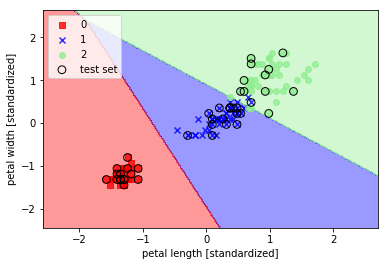

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [30]:
print(X_test_std[0,:])
print(lr.predict_proba(X_test_std[0,:].reshape(1, -1)))

[ 0.70793846  1.50872803]
[[  2.05743774e-11   6.31620264e-02   9.36837974e-01]]


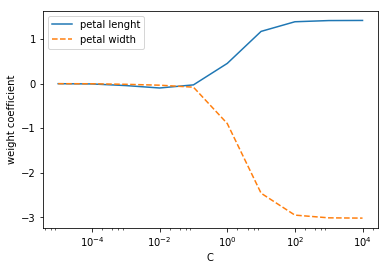

In [33]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal lenght')
plt.plot(params, weights[:, 1], label='petal width',linestyle='--')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## SVM

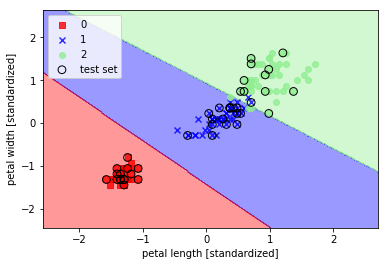

In [34]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                     classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

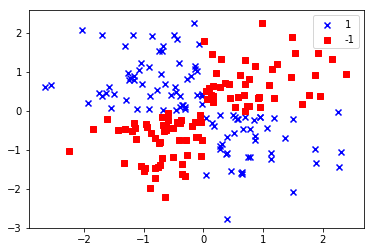

In [35]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1,  0], X_xor[y_xor==1, 1], c='b',
           marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
           c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

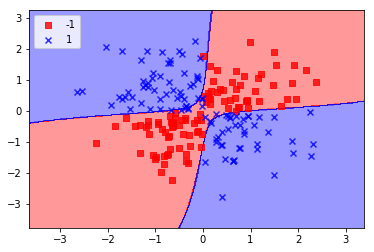

In [36]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

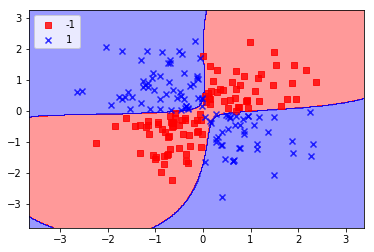

In [37]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.20, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

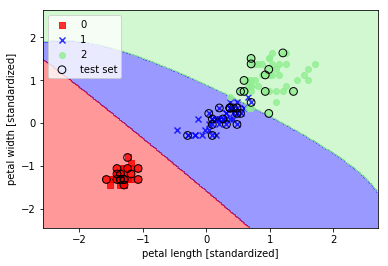

In [39]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.20, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

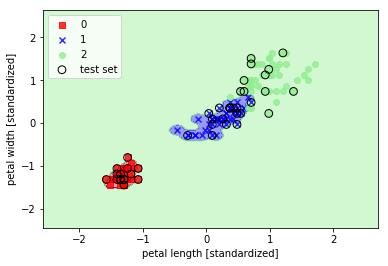

In [40]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Decision Tree

How to choose the impurity measure?

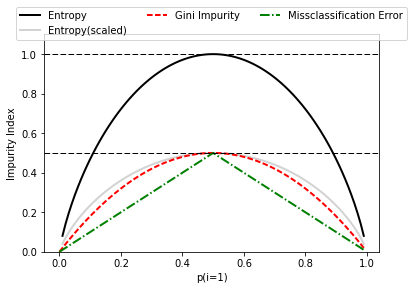

In [41]:
def geni(p):
    return p*(1-p) + (1-p)*p

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

def error(p):
    return 1-np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p !=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
error = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, geni(x), error],
                         ['Entropy', 'Entropy(scaled)','Gini Impurity','Missclassification Error'],
                         ['-','-','--','-.'],
                         ['black','lightgray','red','green','cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
         ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

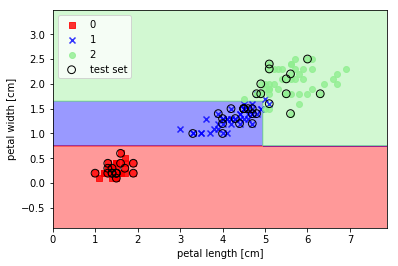

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [43]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])

## Random Forests

1. bootstrap sample of size n (with replacement) (n is equal to the number of the original samples)
2. random select d features without replacement and grow a decision tree (d is sqrt(m), m: the number of all features)
3. repeat 1-2 k times (k: only tuning parameter)
4. aggregate the prediction by each tree to assign the class lable by **majority vote**.

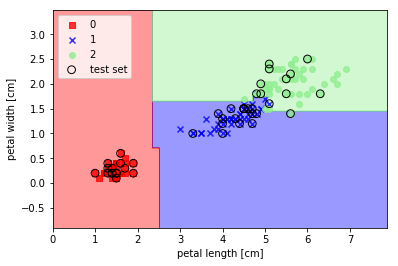

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

## K-nearest neighbors (KNN)

The curse of dimensionality

The phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset.

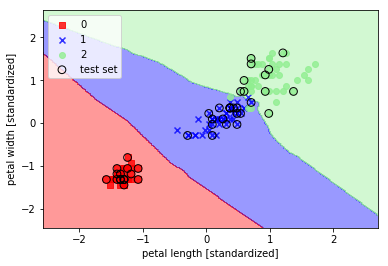

In [45]:
from sklearn.neighbors import KNeighborsClassifier
# p: power parameter for the minkowski distance
# p = 2: Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Summary
1. decision tree: model interpretability
2. logistic regression: oneline learning; predict probability
3. SVM: kernel trick
4. random forests: ensembl methods
5. KNN: lazy learning